In [ ]:
Installing the libraries


In [7]:
import pandas as pd
trnx = pd.read_csv('C:/Users/GHATAGE SUHANI/Desktop/Retail_Data_Transactions.csv')

In [8]:
trnx

,customer_id,trans_date,trans_amount
0,CS5295,2013-02-11,35.0
1,CS4768,2015-03-15,39.0
2,CS2122,2013-02-26,52.0
3,CS1217,2011-11-16,99.0
4,CS1850,2013-11-20,78.0
...,...,...,...
124995,NaN,NaN,NaN
124996,NaN,NaN,NaN
124997,NaN,NaN,NaN
124998,NaN,NaN,NaN


In [14]:
import pandas as pd
response = pd.read_csv('C:/Users/GHATAGE SUHANI/Desktop/Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [15]:
df = trnx.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,trans_amount,response
0,CS5295,2013-02-11,35.0,1.0
1,CS4768,2015-03-15,39.0,1.0
2,CS2122,2013-02-26,52.0,0.0
3,CS1217,2011-11-16,99.0,0.0
4,CS1850,2013-11-20,78.0,0.0
...,...,...,...,...
124995,NaN,NaN,NaN,NaN
124996,NaN,NaN,NaN,NaN
124997,NaN,NaN,NaN,NaN
124998,NaN,NaN,NaN,NaN


In [16]:
#features
df.dtypes

customer_id      object
trans_date       object
trans_amount    float64
response        float64
dtype: object

In [17]:
df.shape

(125000, 4)

In [18]:
df.head()

,customer_id,trans_date,trans_amount,response
0,CS5295,2013-02-11,35.0,1.0
1,CS4768,2015-03-15,39.0,1.0
2,CS2122,2013-02-26,52.0,0.0
3,CS1217,2011-11-16,99.0,0.0
4,CS1850,2013-11-20,78.0,0.0


In [19]:
df.tail()

,customer_id,trans_date,trans_amount,response
124995,NaN,NaN,NaN,NaN
124996,NaN,NaN,NaN,NaN
124997,NaN,NaN,NaN,NaN
124998,NaN,NaN,NaN,NaN
124999,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,trans_amount,response
count,124994.000000,124963.000000
mean,64.992504,0.110761
std,22.859952,0.313837
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:
#missing values

In [21]:
df.isnull().sum()

customer_id      6
trans_date       6
trans_amount     6
response        37
dtype: int64

In [22]:
(37/124994)*100

0.029601420868201674

In [23]:
df = df.dropna()
df

,customer_id,trans_date,trans_amount,response
0,CS5295,2013-02-11,35.0,1.0
1,CS4768,2015-03-15,39.0,1.0
2,CS2122,2013-02-26,52.0,0.0
3,CS1217,2011-11-16,99.0,0.0
4,CS1850,2013-11-20,78.0,0.0
...,...,...,...,...
124989,CS8433,2011-06-26,64.0,0.0
124990,CS7232,2014-08-19,38.0,0.0
124991,CS8731,2014-11-28,42.0,0.0
124992,CS8133,2013-12-14,13.0,0.0


In [41]:
#change data types

df.loc[:, 'trans_date'] = pd.to_datetime(df['trans_date'])

df.loc[:, 'response'] = df['response'].astype('int')


In [42]:
df

,customer_id,trans_date,trans_amount,response
0,CS5295,2013-02-11,35.0,1
1,CS4768,2015-03-15,39.0,1
2,CS2122,2013-02-26,52.0,0
3,CS1217,2011-11-16,99.0,0
4,CS1850,2013-11-20,78.0,0
...,...,...,...,...
124989,CS8433,2011-06-26,64.0,0
124990,CS7232,2014-08-19,38.0,0
124991,CS8731,2014-11-28,42.0,0
124992,CS8133,2013-12-14,13.0,0


In [40]:
set(df['response'])

{0, 1}

In [43]:
df.dtypes

customer_id             object
trans_date      datetime64[ns]
trans_amount           float64
response                 int64
dtype: object

In [ ]:
!pip install scipy
!pip install numpy

In [49]:
# Check for outliers using z-score
from scipy import stats
import numpy as np

# Calculate z-score
z_score = np.abs(stats.zscore(df['trans_amount']))

# Set a threshold
threshold = 3

# Identify outliers
outliers = z_score > threshold

# Print outliers
print(df['trans_amount'][outliers])



Series([], Name: trans_amount, dtype: float64)


In [50]:
# Check for outliers using z-score
from scipy import stats
import numpy as np

# Calculate z-score
z_score = np.abs(stats.zscore(df['response']))

# Set a threshold
threshold = 3

# Identify outliers
outliers = z_score > threshold

# Print outliers
print(df['response'][outliers])



Series([], Name: response, dtype: int64)


In [52]:
!pip install seaborn

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.9 kB 656.4 kB/s eta 0:00:01
     --------------- --------------------- 71.7/165.9 kB 558.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.9 kB 595.3 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 622.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 812.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 819.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 774.0 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


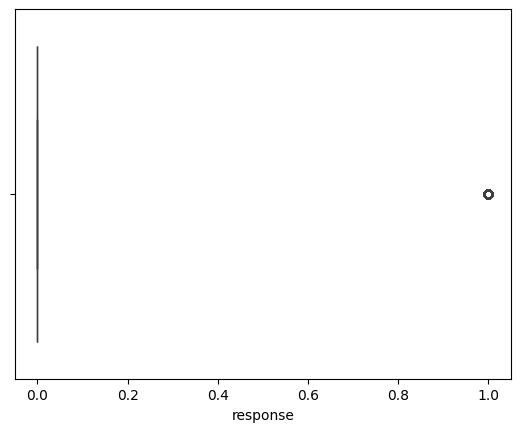

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

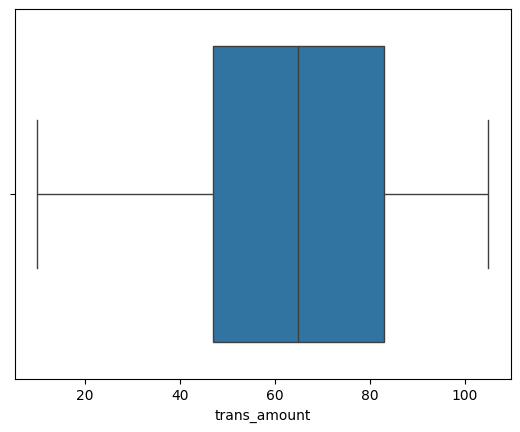

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['trans_amount'])
plt.show()

In [57]:
#creating new columns

df['month'] = df['trans_date'].dt.month

C:\Users\GHATAGE SUHANI\AppData\Local\Temp\ipykernel_14284\1868273868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


In [58]:
df

,customer_id,trans_date,trans_amount,response,month
0,CS5295,2013-02-11,35.0,1,2
1,CS4768,2015-03-15,39.0,1,3
2,CS2122,2013-02-26,52.0,0,2
3,CS1217,2011-11-16,99.0,0,11
4,CS1850,2013-11-20,78.0,0,11
...,...,...,...,...,...
124989,CS8433,2011-06-26,64.0,0,6
124990,CS7232,2014-08-19,38.0,0,8
124991,CS8731,2014-11-28,42.0,0,11
124992,CS8133,2013-12-14,13.0,0,12


In [62]:
# which 3 months have had highest transactions amounts? 

monthly_sales = df.groupby('month')['trans_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,trans_amount
0,8,726775.0
1,10,725010.0
2,1,724089.0


In [66]:
# Customers having highest number of orders

customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts

#sort

top_5_cust = customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cust

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
5,CS2620,35


<Axes: xlabel='customer_id', ylabel='count'>

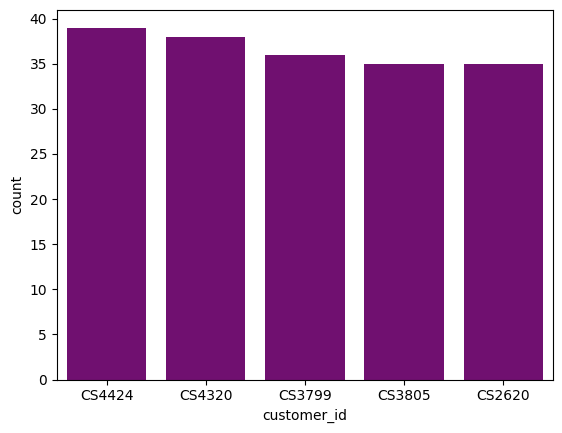

In [72]:
sns.barplot(x='customer_id',y='count',color='purple',data=top_5_cust)

In [78]:
# Customers having highest value of orders

customer_sales = df.groupby('customer_id')['trans_amount'].sum().reset_index()
customer_sales

#sort

top_5_sales = customer_sales.sort_values(by='trans_amount',ascending=False).head(5)
top_5_sales

,customer_id,trans_amount
3312,CS4424,2933.0
3208,CS4320,2647.0
4640,CS5752,2612.0
3548,CS4660,2527.0
2687,CS3799,2513.0


ValueError: Invalid RGBA argument: ['red', 'blue', 'green', 'purple']

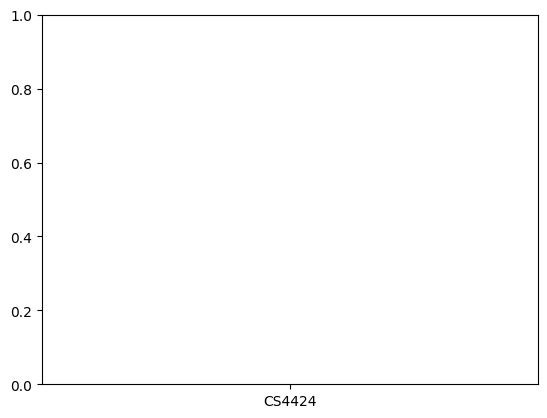

In [83]:
sns.barplot(x='customer_id',y='trans_amount',data=top_5_sales,color=['red', 'blue', 'green', 'purple'])